In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/matches.csv')

In [3]:
df

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season
0,CWC,1966-04-14,1-0,Celtic,Scotland,Celtic_F.C.,Liverpool,England,Liverpool_F.C.,"Celtic Park, Glasgow",semi-finals,76397.0,1965–66 European Cup Winners' Cup,1965-66
1,ICFC,1955-06-04,0-5,Basel XI,Switzerland,Basel,London XI,England,London_XI,"St. Jakob Stadium, Basel",group stage,NaN,1955–58 Inter-Cities Fairs Cup,1955-58
2,UCL,1955-09-04,3-3,Sporting CP,Portugal,Sporting_CP,Partizan,Socialist Federal Republic of Yugoslavia,FK_Partizan,"Estádio Nacional, Lisbon",first round,30000.0,1955–56 European Cup,1955-56
3,UCL,1955-09-07,6-3,Vörös Lobogó,Hungary,MTK_Budapest_FC,Anderlecht,Belgium,R.S.C._Anderlecht,"Népstadion, Budapest",first round,35000.0,1955–56 European Cup,1955-56
4,UCL,1955-09-08,0-2,Servette,Switzerland,Servette_FC,Real Madrid,Spain,Real_Madrid_CF,"Charmilles Stadium, Geneva",first round,7000.0,1955–56 European Cup,1955-56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,UECL,2024-08-15,v,Zrinjski Mostar,Bosnia and Herzegovina,NaN,Botev Plovdiv,Bulgaria,NaN,"Stadion pod Bijelim Brijegom, Mostar",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27176,UECL,2024-08-15,v,Baník Ostrava,Czech Republic,NaN,Copenhagen,Denmark,NaN,"Městský stadion, Ostrava",third qualifying round,NaN,2024–25 UEFA Conference League qualifying phas...,2024-25
27177,EL,2024-08-15,v,Viktoria Plzeň,Czech Republic,NaN,Kryvbas Kryvyi Rih,Ukraine,NaN,"Doosan Arena, Plzeň",third qualifying round,NaN,2024–25 UEFA Europa League qualifying phase an...,2024-25
27178,UCL,NaN,Match unplayed,Derry City,Northern Ireland,Derry_City_F.C.,Anderlecht,Belgium,R.S.C._Anderlecht,NaN,first round,NaN,1965–66 European Cup,1965-66


In [4]:
df['city'] = df['location'].apply(lambda x: x.split(',')[-1].split('(')[0].strip() if isinstance(x, str) else x)

In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [6]:
def count_same_or_higher_date_comp(group):
    group = group.sort_values('date')
    group['remaining_comp'] = group['date'].apply(lambda x: (group['date'] > x).sum())
    return group

In [7]:
remaining = df.groupby(['season','competition']).apply(count_same_or_higher_date_comp).reset_index(drop=True)

C:\Users\micha\AppData\Local\Temp\ipykernel_21480\3916731917.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  remaining = df.groupby(['season','competition']).apply(count_same_or_higher_date_comp).reset_index(drop=True)


In [8]:
df = df.merge(remaining[['competition','date','remaining_comp']])

In [9]:
df = df.drop_duplicates()

In [10]:
df.loc[df['season'] == '2024-25', 'remaining_comp'] = None

In [11]:
serious = ['groups','group stage','group a','group b','group c','group d','round of 32','round of 16','quarter-finals','semi-finals','final']

In [12]:
easternCountries = ['Hungary','Poland','Socialist Federal Republic of Yugoslavia','Romania','Czechoslovakia','Bulgaria','East Germany','Albania','Soviet Union','Commonwealth of Independent States','Slovenia','Estonia','Latvia','Ukraine','Russia','Lithuania','Georgia (country)','Moldova','Croatia','Belarus','Czech Republic','Federal Republic of Yugoslavia','North Macedonia','Armenia','Azerbaijan','Slovakia','Bosnia and Herzegovina','Kazakhstan','Serbia and Montenegro','Serbia','Montenegro','Kosovo']

In [13]:
easternGermanClubs = df[df['homeTeamCountry'] == 'East Germany']['homeTeamUrl'].drop_duplicates().to_list() + ['RB_Leipzig','1._FC_Union_Berlin','1._FC_Magdeburg','Hallescher_FC','FC_Rot-Wei%C3%9F_Erfurt']

In [14]:
df['phase'].drop_duplicates().to_list()

['semi-finals',
 'group stage',
 'first round',
 'quarter-finals',
 'final',
 'preliminary round',
 'knockout stage',
 'qualifying phase',
 'tournament phase',
 'second round',
 nan,
 'third round',
 'qualifying round',
 'groups',
 'group d',
 'group c',
 'group b',
 'group a',
 'round of 16',
 'finals',
 'first qualifying round',
 'second qualifying round',
 'third qualifying round',
 'fourth round',
 'round of 32',
 'play-off round',
 'knockout round play-offs']

In [15]:
east = df[df['homeTeamCountry'].isin(easternCountries) | df['homeTeamUrl'].isin(easternGermanClubs)]
east2 =  df[df['homeTeamCountry'].isin(easternCountries) | df['homeTeamUrl'].isin(easternGermanClubs) | df['awayTeamCountry'].isin(easternCountries) | df['awayTeamUrl'].isin(easternGermanClubs)]
four = df[df['homeTeamCountry'].isin(['Germany','West Germany','Italy','Spain','England'])]

In [16]:
east.groupby('homeTeam')['remaining_comp'].min().nsmallest(50)

homeTeam
Alashkert                 0.0
CFR Cluj                  0.0
CSKA Sofia                0.0
Dinamo Tbilisi            0.0
Dinamo Zagreb             0.0
Dnipro Dnipropetrovsk     0.0
Dynamo Kyiv               0.0
Ferencváros               0.0
Legia Warsaw              0.0
Magdeburg                 0.0
OFK Beograd               0.0
Partizan                  0.0
Rapid București           0.0
Red Star Belgrade         0.0
Riga                      0.0
Rubin Kazan               0.0
Ruch Chorzów              0.0
Shakhtar Donetsk          0.0
Sileks                    0.0
Slovan Bratislava         0.0
Slovan Liberec            0.0
Steaua București          0.0
Tiraspol                  0.0
Union Berlin              0.0
Vojvodina                 0.0
Zenit Saint Petersburg    0.0
Zorya Luhansk             0.0
Ararat-Armenia            1.0
Banik Ostrava             1.0
Budućnost Podgorica       1.0
CSKA Moscow               1.0
Celje                     1.0
Dinamo București          1.0
D

In [17]:
venku = df[(df['awayTeamCountry'].str.contains('Cze',na=False)) & (df['competition'] == 'UCL')].groupby(['awayTeam','season'])['remaining_comp'].min().groupby('awayTeam').first().nsmallest(20)
doma = df[(df['homeTeamCountry'].str.contains('Cze',na=False)) & (df['competition'] == 'UCL')].groupby(['homeTeam','season'])['remaining_comp'].min().groupby('homeTeam').first().nsmallest(20)
oboje = pd.concat([venku, doma], axis=1)
oboje = oboje.min(axis=1)
oboje.nsmallest(50)

Spartak Trnava                  2.0
Sparta Prague                   5.0
Sparta Praha                    5.0
Spartak Hradec Králové          9.0
Vítkovice                      13.0
Zbrojovka Brno                 13.0
Baník Ostrava                  13.0
Bohemians Prague               13.0
Slovan Bratislava              14.0
Dukla Prague                   16.0
Slovan UNV Bratislava          16.0
Červená Hviezda Bratislava     21.0
Viktoria Plzeň                 37.0
Slavia Prague                  61.0
Mladá Boleslav                 96.0
Teplice                       157.0
Slovan Liberec                157.0
dtype: float64

In [18]:
df[(df['competition'] == 'UCL') & (df['homeTeam'].str.contains('Slavia',na=False))].sort_values(by='remaining_comp').head(10)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_comp
213640,UCL,2007-12-12,0-3,Slavia Prague,Czech Republic,SK_Slavia_Prague,Sevilla,Spain,Sevilla_FC,"Stadion Evžena Rošického, Prague",groups,11689.0,2007–08 UEFA Champions League group stage,2007-08,Prague,29.0
387679,UCL,2019-11-27,1-3,Slavia Prague,Czech Republic,SK_Slavia_Prague,Inter Milan,Italy,Inter_Milan,"Sinobo Stadium, Prague",groups,19370.0,2019–20 UEFA Champions League group stage,2019-20,Prague,39.0
94741,UCL,1996-08-21,0-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,Grasshopper,Switzerland,Grasshopper_Club_Z%C3%BCrich,"Stadion Evžena Rošického, Prague",NaN,3012.0,1996–97 UEFA Champions League qualifying round,1996-97,Prague,61.0
212784,UCL,2007-11-07,0-0,Slavia Prague,Czech Republic,SK_Slavia_Prague,Arsenal,England,Arsenal_F.C.,"Stadion Evžena Rošického, Prague",groups,18000.0,2007–08 UEFA Champions League group stage,2007-08,Prague,61.0
386301,UCL,2019-10-23,1-2,Slavia Prague,Czech Republic,SK_Slavia_Prague,Barcelona,Spain,FC_Barcelona,"Sinobo Stadium, Prague",groups,19170.0,2019–20 UEFA Champions League group stage,2019-20,Prague,71.0
385613,UCL,2019-10-02,0-2,Slavia Prague,Czech Republic,SK_Slavia_Prague,Borussia Dortmund,Germany,Borussia_Dortmund,"Sinobo Stadium, Prague",groups,19370.0,2019–20 UEFA Champions League group stage,2019-20,Prague,87.0
209194,UCL,2007-09-19,2-1,Slavia Prague,Czech Republic,SK_Slavia_Prague,Steaua București,Romania,FC_Steaua_Bucure%C8%99ti,"Stadion Evžena Rošického, Prague",groups,15723.0,2007–08 UEFA Champions League group stage,2007-08,Prague,109.0
384347,UCL,2019-08-28,1-0,Slavia Prague,Czech Republic,NaN,CFR Cluj,Romania,NaN,"Sinobo Stadium, Prague",play-off round,18562.0,2019–20 UEFA Champions League qualifying phase...,2019-20,Prague,119.0
219685,UCL,2008-08-27,0-0,Slavia Prague,Czech Republic,SK_Slavia_Prague,Fiorentina,Italy,ACF_Fiorentina,"Synot Tip Arena, Prague",third qualifying round,14943.0,2008–09 UEFA Champions League qualifying rounds,2008-09,Prague,125.0
162835,UCL,2003-08-27,2-0,Slavia Prague,Czech Republic,SK_Slavia_Prague,Celta Vigo,Spain,RC_Celta_de_Vigo,"Stadion Evžena Rošického, Prague",third qualifying round,8091.0,2003–04 UEFA Champions League qualifying rounds,2003-04,Prague,125.0


In [19]:
east[east['phase'] == 'final'].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_comp
1614,ICFC,1963-06-12,1-2,Dinamo Zagreb,Socialist Federal Republic of Yugoslavia,GNK_Dinamo_Zagreb,Valencia,Spain,Valencia_CF,"Stadion Maksimir, Zagreb",final,40000.0,1962–63 Inter-Cities Fairs Cup,1962-63,Zagreb,1.0
3626,ICFC,1968-09-11,0-0,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Leeds United,England,Leeds_United_F.C.,"Népstadion, Budapest",final,76000.0,1967–68 Inter-Cities Fairs Cup,1967-68,Budapest,0.0
3627,ICFC,1968-09-11,0-0,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,Leeds United,England,Leeds_United_F.C.,"Népstadion, Budapest",final,76000.0,1967–68 Inter-Cities Fairs Cup,1967-68,Budapest,41.0
4159,CWC,1969-05-21,3-2,Slovan Bratislava,Czechoslovakia,%C5%A0K_Slovan_Bratislava,Barcelona,Spain,FC_Barcelona,"St. Jakob Stadium, Basel",final,19000.0,1968–69 European Cup Winners' Cup,1968-69,Basel,0.0
14623,CWC,1974-05-08,2-0,Magdeburg,East Germany,1._FC_Magdeburg,Milan,Italy,A.C._Milan,"De Kuip, Rotterdam",final,4641.0,1973–74 European Cup Winners' Cup,1973-74,Rotterdam,0.0
17069,CWC,1975-05-14,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Ferencváros,Hungary,Ferencv%C3%A1rosi_TC,"St. Jakob Stadium, Basel",final,13000.0,1974–75 European Cup Winners' Cup,1974-75,Basel,0.0
28907,EL,1979-05-09,1-1,Red Star Belgrade,Socialist Federal Republic of Yugoslavia,Red_Star_Belgrade,Borussia Mönchengladbach,West Germany,Borussia_M%C3%B6nchengladbach,"Red Star Stadium, Belgrade",final,64312.0,1978–79 UEFA Cup,1978-79,Belgrade,1.0
35151,CWC,1981-05-13,2-1,Dinamo Tbilisi,Soviet Union,FC_Dinamo_Tbilisi,FC Carl Zeiss Jena,East Germany,FC_Carl_Zeiss_Jena,"Rheinstadion, Düsseldorf",final,4750.0,1980–81 European Cup Winners' Cup,1980-81,Düsseldorf,0.0
48690,EL,1985-05-08,0-3,Videoton,Hungary,Videoton_FC,Real Madrid,Spain,Real_Madrid_CF,"Sóstói Stadion, Székesfehérvár",final,35000.0,1984–85 UEFA Cup,1984-85,Székesfehérvár,1.0
52207,CWC,1986-05-02,3-0,Dynamo Kyiv,Soviet Union,FC_Dynamo_Kyiv,Atlético Madrid,Spain,Atl%C3%A9tico_Madrid,"Stade de Gerland, Lyon",final,39300.0,1985–86 European Cup Winners' Cup,1985-86,Lyon,0.0


In [20]:
east[east['phase'].isin(serious)].groupby('location')['homeTeamUrl'].nunique().nlargest(50)

location
Népstadion, Budapest                               7
Arena Națională, Bucharest                         5
Luzhniki Stadium, Moscow                           5
Vasil Levski National Stadium, Sofia               5
Arena Lviv, Lviv                                   4
Dinamo Stadium, Minsk                              4
Stadionul Steaua, Bucharest                        4
Bazaly, Ostrava                                    3
Dynamo Stadium, Moscow                             3
Kuban Stadium, Krasnodar                           3
Lokomotiv Stadium, Moscow                          3
NSC Olimpiyskiy Stadium, Kyiv                      3
Red Star Stadium, Belgrade                         3
Andrův stadion, Olomouc                            2
Arena Khimki, Khimki                               2
Astana Arena, Astana                               2
Borisov Arena, Barysaw                             2
Central Dynamo Stadium, Moscow                     2
Chornomorets Stadium, Odesa          

In [21]:
east[east['phase'].isin(serious)].groupby('homeTeamCountry')['location'].nunique().nlargest(50)

homeTeamCountry
Ukraine                                     34
Russia                                      32
Poland                                      31
Czech Republic                              27
Romania                                     27
Socialist Federal Republic of Yugoslavia    25
Soviet Union                                23
Hungary                                     21
Czechoslovakia                              19
Bulgaria                                    18
Croatia                                     12
East Germany                                12
Federal Republic of Yugoslavia               8
Slovakia                                     8
Serbia                                       7
Germany                                      7
Azerbaijan                                   6
Slovenia                                     5
Belarus                                      5
Lithuania                                    4
Georgia (country)                           

In [22]:
east[east['phase'].isin(serious)].groupby('city').size().nlargest(60)

city
Moscow              174
Prague              135
Kyiv                133
Bucharest           107
Belgrade            104
Zagreb               70
Saint Petersburg     68
Budapest             63
Sofia                59
Donetsk              49
Warsaw               40
Baku                 37
Leipzig              34
Plzeň                34
Cluj-Napoca          33
Kharkiv              30
Krasnodar            29
Lviv                 26
Bratislava           25
Maribor              24
Razgrad              23
Minsk                22
Kazan                21
Astana               19
Barysaw              19
Poznań               18
Tiraspol             18
Dnipropetrovsk       17
Liberec              17
Khimki               16
Split                15
Tbilisi              15
Berlin               13
Rijeka               13
Trnava               13
Kraków               10
Riga                 10
Dresden               9
Košice                8
Odesa                 8
Vilnius               7
Yerevan    

In [23]:
east[east['phase'].isin(serious)].groupby('location').size().nlargest(50)

location
Luzhniki Stadium, Moscow                           69
Stadion Maksimir, Zagreb                           59
Petrovsky Stadium, Saint Petersburg                49
Stadionul Steaua, Bucharest                        42
Lokomotiv Stadium, Moscow                          40
Partizan Stadium, Belgrade                         39
Vasil Levski National Stadium, Sofia               39
Arena Națională, Bucharest                         33
Metalist Stadium, Kharkiv                          30
Olympic Stadium, Kyiv                              29
Red Star Stadium, Belgrade                         29
Doosan Arena, Plzeň                                28
Red Bull Arena, Leipzig                            28
Stadionul Dr. Constantin Rădulescu, Cluj-Napoca    28
Generali Arena, Prague                             26
NSC Olimpiyskiy Stadium, Kyiv                      26
Ljudski vrt, Maribor                               24
Arena Lviv, Lviv                                   22
Stadion Letná, Prag

In [24]:
east[east['phase'] == 'Semi-finals'].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_comp


In [25]:
east[east['phase'] == 'Quarter-finals'].tail(20)

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_comp


In [26]:
df.groupby(['competition','phase'])['homeTeam'].nunique().head(250).tail(60)

competition  phase                   
CWC          tournament phase              8
EL           final                        55
             first qualifying round      524
             first round                 626
             fourth round                 55
             groups                      273
             knockout round play-offs     41
             play-off round              278
             preliminary round           161
             qualifying round            179
             quarter-finals              180
             round of 16                 127
             round of 32                 178
             second qualifying round     562
             second round                360
             semi-finals                 112
             third qualifying round      366
             third round                 238
ICFC         final                        11
             first round                 173
             group stage                  10
             knoc

In [27]:
df[df['homeTeamCountry'] == 'Germany']['homeTeamUrl'].drop_duplicates()

702                         1._FC_N%C3%BCrnberg
1518                              Bayern_Munich
1564                           FC_Bayern_Munich
1762                          Borussia_Dortmund
1931                               Hamburger_SV
3204                        Eintracht_Frankfurt
11460             Borussia_M%C3%B6nchengladbach
31913                             VfB_Stuttgart
35144                           1._FC_K%C3%B6ln
68046                            Dynamo_Dresden
68781                           1._FC_Magdeburg
69102                       Bayer_04_Leverkusen
69627                      1._FC_Kaiserslautern
69667     Eisenh%C3%BCttenst%C3%A4dter_FC_Stahl
69976                             Hallescher_FC
70469                          SV_Werder_Bremen
70549                   FC_Rot-Wei%C3%9F_Erfurt
73555                               Hannover_96
75087                             Karlsruher_SC
86985                               SC_Freiburg
90631                     TSV_1860_M%C3%

<Axes: xlabel='season'>

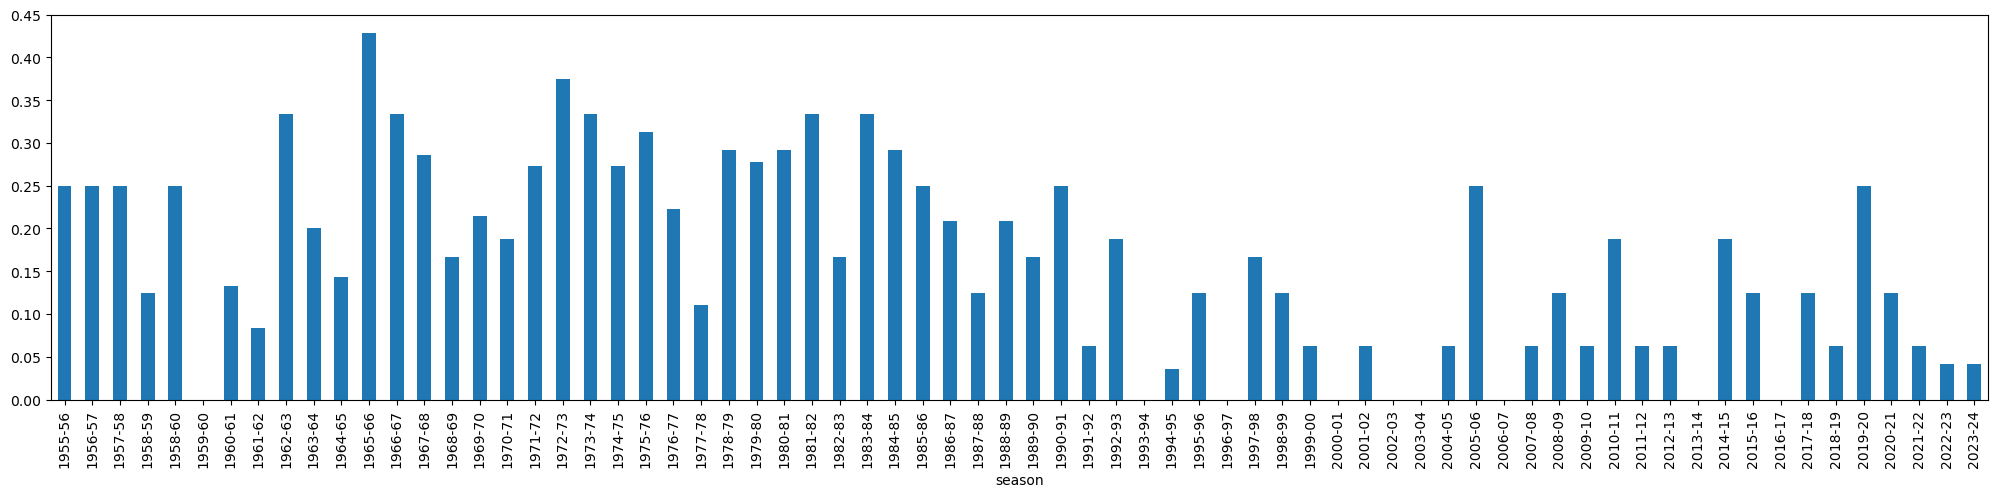

In [28]:
pd.Series(east[east['phase'] == 'quarter-finals'].groupby('season')['homeTeam'].nunique() / df[df['phase'] == 'quarter-finals'].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [29]:
df['competition']

0          CWC
1         ICFC
2          UCL
3          UCL
4          UCL
          ... 
447203    UECL
447230    UECL
447257      EL
447268     UCL
447269      EL
Name: competition, Length: 27224, dtype: object

<Axes: xlabel='season'>

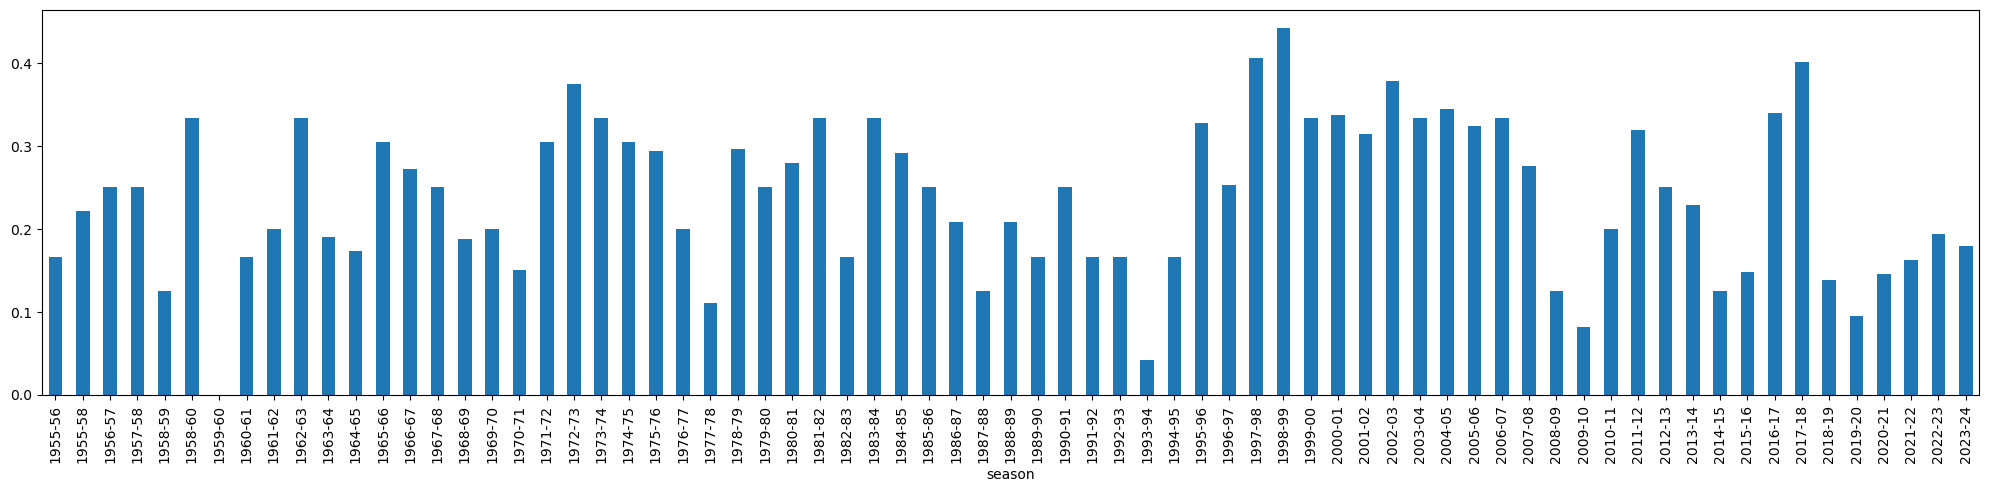

In [30]:
pd.Series(east[east['date'].dt.month.isin([1,2,3,4,5,6])].groupby('season')['homeTeam'].nunique() / df[df['date'].dt.month.isin([1,2,3,4,5,6])].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

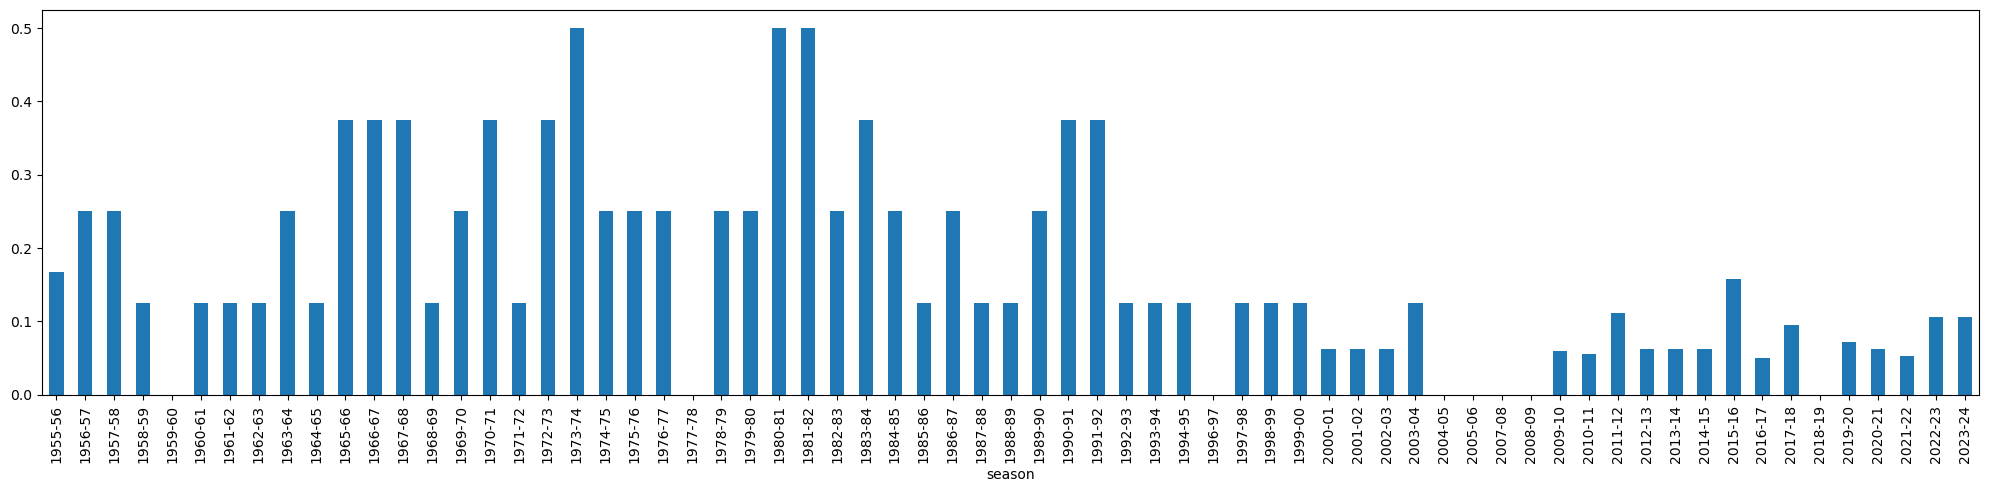

In [31]:
pd.Series(east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

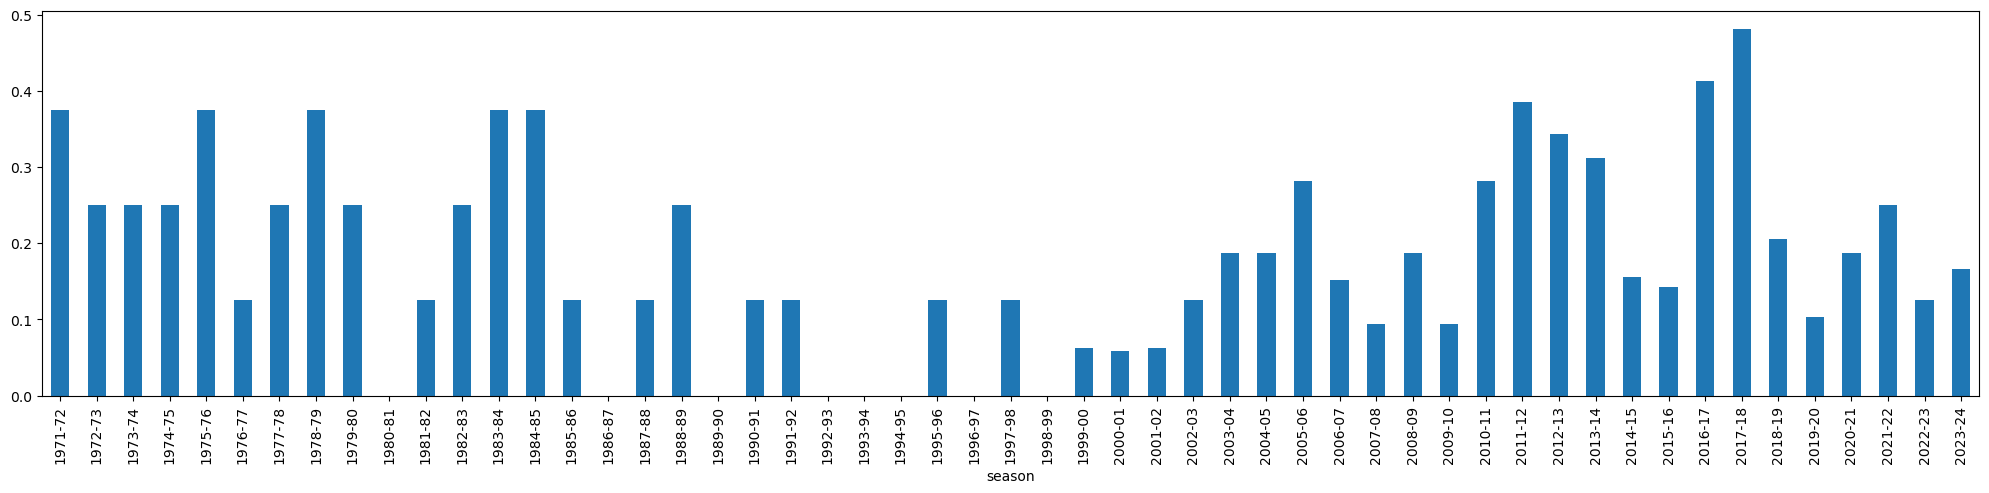

In [32]:
pd.Series(east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'EL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'EL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

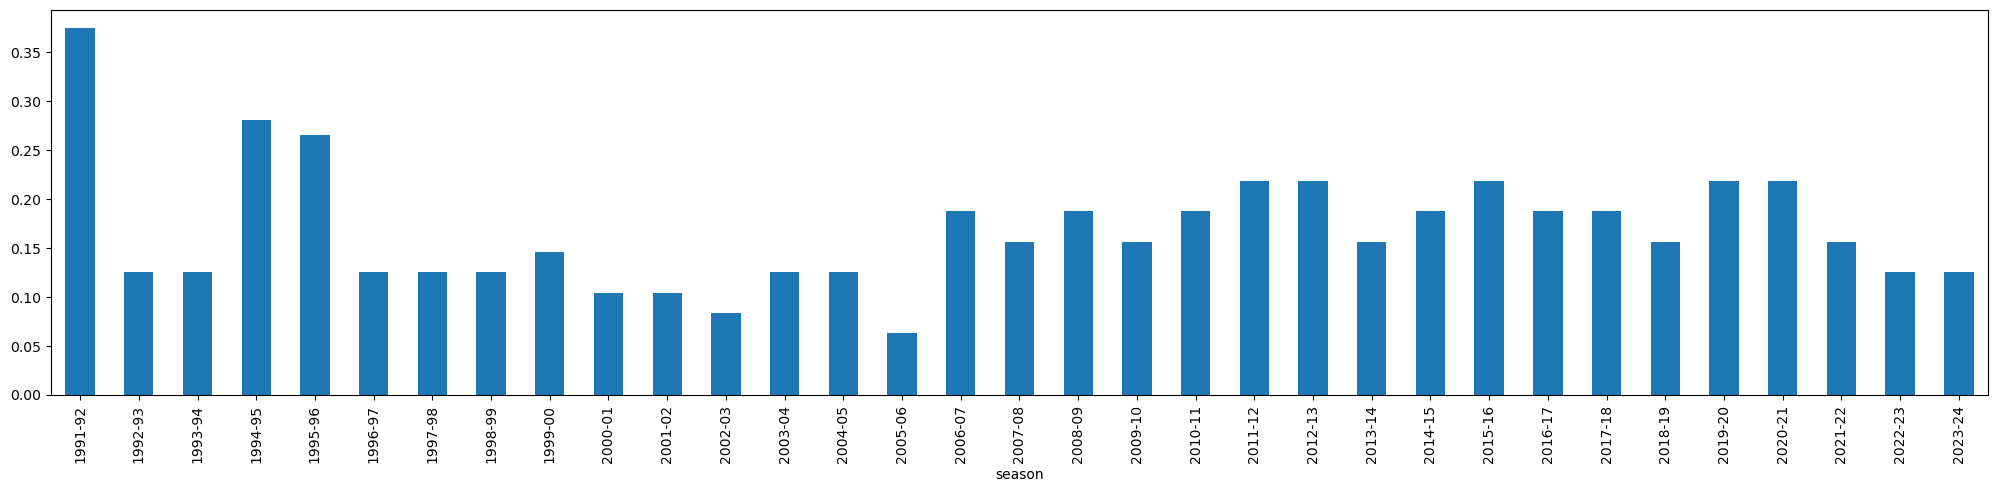

In [33]:
pd.Series(east[(east['phase'].str.lower().str.contains('group',na=False)) & (east['competition'] == 'UCL')].groupby('season').size() / df[(df['phase'].str.lower().str.contains('group',na=False)) & (df['competition'] == 'UCL')].groupby('season').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

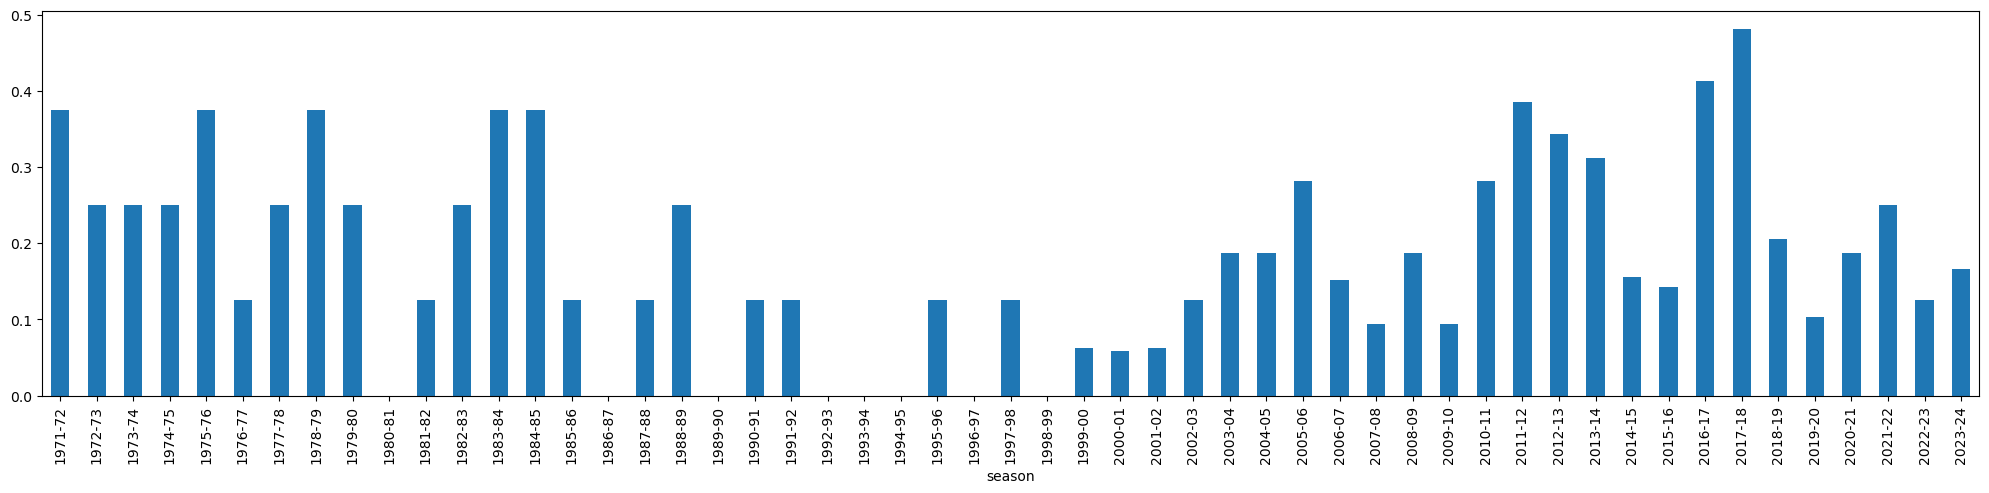

In [34]:
pd.Series(east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'EL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'EL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='season'>

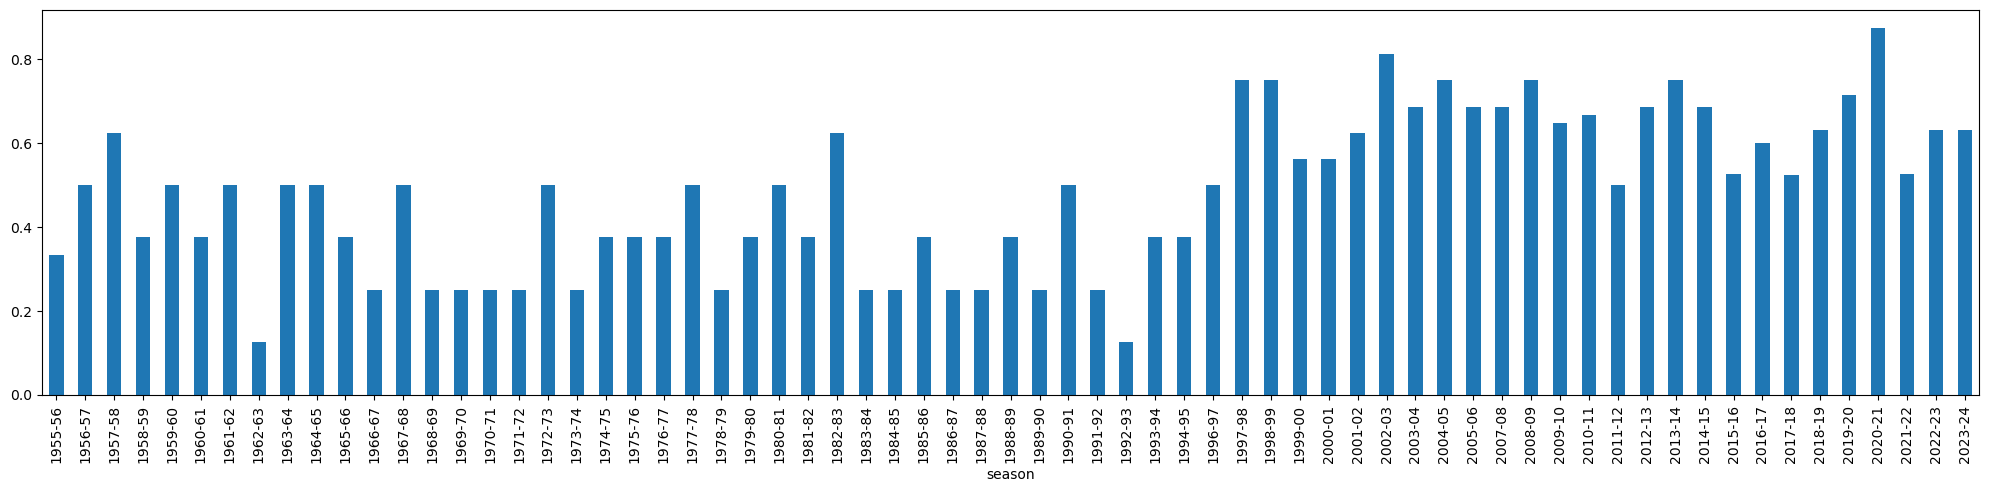

In [35]:
pd.Series(four[(four['date'].dt.month.isin([1,2,3,4,5,6])) & (four['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique() / df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique()).plot.bar(figsize=(25,5))

In [36]:
df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique().tail(40)

season
1982-83     8
1983-84     8
1984-85     8
1985-86     8
1986-87     8
1987-88     8
1988-89     8
1989-90     8
1990-91     8
1991-92     8
1992-93     8
1993-94     8
1994-95     8
1996-97     8
1997-98     8
1998-99     8
1999-00    16
2000-01    16
2001-02    16
2002-03    16
2003-04    16
2004-05    16
2005-06    16
2007-08    16
2008-09    16
2009-10    17
2010-11    18
2011-12    18
2012-13    16
2013-14    16
2014-15    16
2015-16    19
2016-17    20
2017-18    21
2018-19    19
2019-20    14
2020-21    16
2021-22    19
2022-23    19
2023-24    19
Name: homeTeam, dtype: int64

In [37]:
east[(east['date'].dt.month.isin([1,2,3,4,5,6])) & (east['competition'] == 'UCL')].groupby('season')['homeTeam'].nunique().tail(40)

season
1975-76    2
1976-77    2
1978-79    2
1979-80    2
1980-81    4
1981-82    4
1982-83    2
1983-84    3
1984-85    2
1985-86    1
1986-87    2
1987-88    1
1988-89    1
1989-90    2
1990-91    3
1991-92    3
1992-93    1
1993-94    1
1994-95    1
1997-98    1
1998-99    1
1999-00    2
2000-01    1
2001-02    1
2002-03    1
2003-04    2
2009-10    1
2010-11    1
2011-12    2
2012-13    1
2013-14    1
2014-15    1
2015-16    3
2016-17    1
2017-18    2
2019-20    1
2020-21    1
2021-22    1
2022-23    2
2023-24    2
Name: homeTeam, dtype: int64

In [38]:
df[(df['date'].dt.month.isin([8,9,10])) & (df['homeTeamCountry'].isin(['Czechoslovakia','Czech Republic']))].groupby('season')['homeTeam'].nunique().tail(40)

season
1985-86    5
1986-87    5
1987-88    4
1988-89    4
1989-90    4
1990-91    4
1991-92    4
1992-93    4
1993-94    3
1994-95    3
1995-96    3
1996-97    3
1997-98    5
1998-99    4
1999-00    5
2000-01    4
2001-02    7
2002-03    5
2003-04    5
2004-05    4
2005-06    4
2006-07    4
2007-08    4
2008-09    4
2009-10    5
2010-11    3
2011-12    4
2012-13    4
2013-14    3
2014-15    3
2015-16    4
2016-17    5
2017-18    4
2018-19    5
2019-20    5
2020-21    4
2021-22    4
2022-23    3
2023-24    4
2024-25    5
Name: homeTeam, dtype: int64

In [39]:
df[(df['date'].dt.month.isin([1,2,3,4,5,6])) & (df['homeTeamCountry'].isin(['Czechoslovakia','Czech Republic']))].groupby('season')['homeTeam'].nunique().tail(40)

season
1963-64    2
1965-66    1
1966-67    1
1967-68    1
1968-69    2
1972-73    2
1973-74    1
1974-75    1
1978-79    3
1979-80    1
1980-81    1
1982-83    1
1983-84    1
1984-85    1
1985-86    1
1987-88    1
1991-92    2
1992-93    1
1994-95    1
1995-96    2
1997-98    3
1998-99    1
1999-00    3
2000-01    1
2001-02    4
2002-03    2
2003-04    3
2004-05    1
2005-06    1
2007-08    1
2010-11    1
2011-12    1
2012-13    2
2013-14    2
2015-16    1
2016-17    1
2017-18    1
2018-19    2
2020-21    1
2023-24    3
Name: homeTeam, dtype: int64

In [40]:
east[east['competition'] == 'UCL'].groupby('homeTeam').size().nlargest(16)

homeTeam
Dynamo Kyiv               132
Red Star Belgrade          80
Shakhtar Donetsk           79
Sparta Prague              72
Steaua București           70
Dinamo Zagreb              67
Spartak Moscow             61
Partizan                   53
BATE Borisov               52
CSKA Moscow                52
Sheriff Tiraspol           45
Maribor                    40
Ferencváros                39
Legia Warsaw               38
Zenit Saint Petersburg     36
Ludogorets Razgrad         35
dtype: int64

In [41]:
df[df['homeTeamCountry'] == df['awayTeamCountry']].groupby(['competition','awayTeamCountry']).size().nlargest(20)

competition  awayTeamCountry
EL           Spain              32
UCL          Spain              26
             England            25
EL           Italy              21
             West Germany       19
UCL          Italy              11
EL           England             7
             Germany             7
Intertoto    Spain               6
UCL          Germany             5
CWC          England             4
EL           France              4
             Ukraine             4
ICFC         England             4
             Spain               4
EL           Portugal            3
Intertoto    France              3
CWC          Belgium             2
             Germany             2
             Spain               2
dtype: int64

In [42]:
east[east['homeTeamCountry'] == east['awayTeamCountry']]

,competition,date,score,homeTeam,homeTeamCountry,homeTeamUrl,awayTeam,awayTeamCountry,awayTeamUrl,location,phase,attendance,competitonOriginal,season,city,remaining_comp
45071,EL,1983-11-23,0-2,Radnički Niš,Socialist Federal Republic of Yugoslavia,FK_Radni%C4%8Dki_Ni%C5%A1,Hajduk Split,Socialist Federal Republic of Yugoslavia,HNK_Hajduk_Split,"Stadion Čair, Niš",third round,20002.0,1983–84 UEFA Cup,1983-84,Niš,22.0
45143,EL,1983-12-07,2-0,Hajduk Split,Socialist Federal Republic of Yugoslavia,HNK_Hajduk_Split,Radnički Niš,Socialist Federal Republic of Yugoslavia,FK_Radni%C4%8Dki_Ni%C5%A1,"Stadion Poljud, Split",third round,25000.0,1983–84 UEFA Cup,1983-84,Split,14.0
127536,Intertoto,2000-07-26,3-1,Sigma Olomouc,Czech Republic,SK_Sigma_Olomouc,Chmel Blšany,Czech Republic,FK_Chmel_Bl%C5%A1any,"Andrův stadion, Olomouc",semi-finals,939.0,2000 UEFA Intertoto Cup,1999-00,Olomouc,12.0
127706,Intertoto,2000-08-02,0-0,Chmel Blšany,Czech Republic,FK_Chmel_Bl%C5%A1any,Sigma Olomouc,Czech Republic,SK_Sigma_Olomouc,"FK Chmel Blšany, Blšany",semi-finals,800.0,2000 UEFA Intertoto Cup,1999-00,Blšany,6.0
191566,EL,2006-03-30,1-1,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,Steaua București,Romania,FC_Steaua_Bucure%C8%99ti,"Stadionul Giulești-Valentin Stănescu, Bucharest",quarter-finals,15000.0,2005–06 UEFA Cup knockout stage,2005-06,Bucharest,9.0
191594,EL,2006-04-06,0-0,Steaua București,Romania,FC_Steaua_Bucure%C8%99ti,Rapid București,Romania,FC_Rapid_Bucure%C8%99ti,"Stadionul Național, Bucharest",quarter-finals,39750.0,2005–06 UEFA Cup knockout stage,2005-06,Bucharest,5.0
225708,EL,2009-03-12,1-0,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Metalist Kharkiv,Ukraine,FC_Metalist_Kharkiv,"Lobanovsky Dynamo Stadium, Kyiv",round of 16,17800.0,2008–09 UEFA Cup knockout stage,2008-09,Kyiv,21.0
225776,EL,2009-03-19,3-2,Metalist Kharkiv,Ukraine,FC_Metalist_Kharkiv,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,"Metalist Stadium, Kharkiv",round of 16,26000.0,2008–09 UEFA Cup knockout stage,2008-09,Kharkiv,13.0
225862,EL,2009-04-30,1-1,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,"Lobanovsky Dynamo Stadium, Kyiv",semi-finals,17000.0,2008–09 UEFA Cup knockout stage,2008-09,Kyiv,3.0
225870,EL,2009-05-07,2-1,Shakhtar Donetsk,Ukraine,FC_Shakhtar_Donetsk,Dynamo Kyiv,Ukraine,FC_Dynamo_Kyiv,"RSK Olimpiyskyi, Donetsk",semi-finals,24300.0,2008–09 UEFA Cup knockout stage,2008-09,Donetsk,1.0


## Albánie

In [43]:
df[(df['homeTeamCountry'] == 'Czech Republic') & (df['competition'] == 'UCL')].groupby('season').size()

season
1993-94    2
1994-95    1
1996-97    1
1997-98    4
1998-99    1
1999-00    7
2000-01    6
2001-02    7
2002-03    3
2003-04    7
2004-05    6
2005-06    4
2006-07    3
2007-08    6
2008-09    3
2009-10    2
2010-11    3
2011-12    6
2012-13    2
2013-14    6
2014-15    2
2015-16    2
2016-17    3
2017-18    3
2018-19    4
2019-20    5
2020-21    1
2021-22    3
2022-23    6
2023-24    1
2024-25    3
dtype: int64